# Neural Network From Scratch (NumPy Only)

###  Overview
This project is an educational, from-first-principles implementation of a fully working neural network using only **NumPy**.  
The goal is to build every major component manually — without deep learning frameworks — in order to deeply understand the mathematical and algorithmic foundations behind modern neural networks.

This notebook documents the entire development process step-by-step, including:
- implementation of dense layers  
- activation functions (ReLU, Softmax)  
- losses (categorical cross-entropy)  
- forward passes  
- gradient calculations for backpropagation  
- initial training loop experiments  

The project is actively in development. While not yet complete, it already demonstrates the core mechanisms behind feedforward neural networks and gradual construction of a minimal deep learning library.

---

###  Current Features Implemented
- `LayerDense`: fully-connected layer with weights + biases  
- `ActivationReLU`: Rectified Linear Unit activation function
- `ActivationSoftmax`: probability output distribution  
- `LossCategoricalCrossentropy`: multi-class loss  
- Forward pass through multi-layer architecture  
- Numerical stability improvements (max-shift softmax)  
- Initial gradient exploration  

---

###  In Progress
- Backpropagation for all components  
- Training loop with parameter updates  
- Accuracy tracking  
- Mini-batch gradient descent  
- Optimizers (SGD, Momentum, Adam)  
- `Model` class to manage layers and training  

---

###  Goals
By the end of the project, the network will be able to:
- train on small toy datasets (spiral, blobs, MNIST subset)  
- achieve correct class separation  
- support various activation functions  
- handle multiple layers  
- visualize training curves  

This notebook will eventually evolve into a minimal but complete deep learning framework built entirely from scratch.


# Neuron Network

A neuron network is basically a system that takes wheight and bias in a form of a linear function to make calculations: output = weight . input + bias (y = wx + b).

## Single neuron

A simple exemple of a neuron would be

In [1]:
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = inputs[0] * weights[0] + inputs[1] * weights[1] + inputs[2] * weights[2] + bias
print(output)

2.3


In [2]:
# With numpy

import numpy as np

output = np.dot(np.array(inputs), np.array(weights)) + bias
print(output)

4.8


## Layer of neurons

Uses multiple weights for multiple biases, which means multiple neurons. 

Each neuron applies different weights and bias to each imput, therefore it is known as a fully connected neural network.

In [3]:
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8,-0.5, 1]
weights2 = [0.5,-0.91, 0.26,-0.5]
weights3 = [-0.26,-0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [
    # Neuron 1:
    inputs[0]*weights1[0] +
    inputs[1]*weights1[1] +
    inputs[2]*weights1[2] +
    inputs[3]*weights1[3] + bias1,
    # Neuron 2:
    inputs[0]*weights2[0] +
    inputs[1]*weights2[1] +
    inputs[2]*weights2[2] +
    inputs[3]*weights2[3] + bias2,
    # Neuron 3:
    inputs[0]*weights3[0] +
    inputs[1]*weights3[1] +
    inputs[2]*weights3[2] +
    inputs[3]*weights3[3] + bias3]
print(outputs)

[4.8, 1.21, 2.385]


In [4]:
# Applying loops to simplify code

inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

inputs = np.array(inputs)
layer_outputs =[]

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input * weight
    
    neuron_output += bias
    layer_outputs.append(neuron_output)
    
print(layer_outputs)

[np.float64(4.8), np.float64(0.20999999999999996), np.float64(3.885)]


In [5]:
# Using numpy

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

[4.8   1.21  2.385]


## Batch of imputs

In [6]:
inputs = [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]


outputs = np.dot(inputs, np.array(weights).T) + biases
print(outputs)


[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


## Adding layers

To create a new layer, we are going to copy and paste our weights and biases to weights2
and biases2, and change their values to new made up sets.

In [7]:
inputs = [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

# Calculating the outputs
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## Training data

Now, we use non-linear data to test if our model can fit it

In [8]:
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

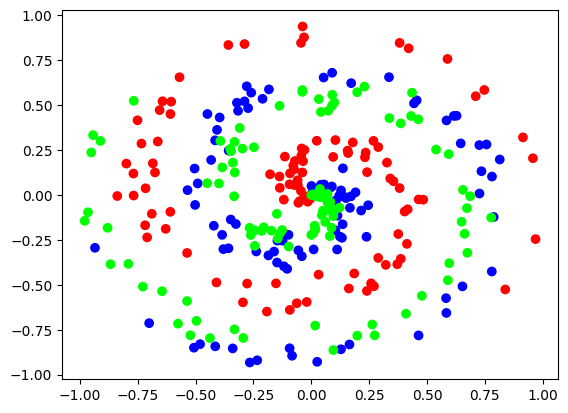

In [9]:
# Understanding the data

import matplotlib.pyplot as plt

X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

## Dense Layer Class

Creating a class so we don't need to manualy imput the neuron network layers.

For initialization it is used random weights and biases for a untrained network. The forward pass method makes the data pass throught the entire newtork.

In [10]:
class LayerDense:
    
    # Layer initialization (initialize weights and biases)
    def __init__(self, n_inputs, n_neurons) -> None:
        self.weights = 0.01* np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    #forward pass (Calculate output values from inputs, weights and biases)
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases



In [11]:
# Applying the method to the data

dense1 = LayerDense(2, 3)

dense1.forward(X)

print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


## Activation functions

Activation functions are used in hidden layers to fit a nonlinear function.

The most commonly used Activation function is the Rectified Linear Units activation function (ReLU). It basically looks like a linear function for x>0 and is zero for x<0.

Including multiple neurons with the activation function will generate a curve in wich the input(x) and output(y) point (x, y) will be.

![Pair of neurons with ReLU activation function](figs/Activation%20function.png)

The code for ReLU activation function is as follows:

In [12]:
inputs = [0, 1, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
    output.append(max(0,i))

print(output)

[0, 1, 2, 0, 3.3, 0, 1.1, 2.2, 0]


It is symplifyed by numpy as

In [13]:
inputs = [0, 1, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0, inputs)

print(output)

[0.  1.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [14]:
# Creating the ReLU activation function class

class ActivationRelu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [15]:
# Create dense layer
dense1 = LayerDense(2, 3)

# Create RelU activation (to be used with dense layer)
activation1 = ActivationRelu()

#Make a forward pass of the training data
dense1.forward(X)

# forward pass through activation function
activation1.forward(dense1.output)

print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.         0.00012475]
 [0.         0.         0.00025709]
 [0.         0.         0.0002559 ]
 [0.         0.         0.00037327]]


## The Softmax Activation function

Used in the construction of classifiers. It receives non normalized values and returns a propability distribution.

In [16]:
# The formula for this fucntion 

layer_outputs = [4.8, 1.21, 2.385]

# Exponentiating values
exp_values = np.exp(layer_outputs)

# Normalizing values
norm_values = exp_values / np.sum(exp_values)

norm_sum = np.sum(norm_values)

print(f"The normalized values are ({norm_values}) and the sum of them is {norm_sum}")

The normalized values are ([0.89528266 0.02470831 0.08000903]) and the sum of them is 0.9999999999999999


Now, we convert the code to accept batches, and create the class

In [17]:
class ActivationSoftmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs)
        
        # Summing the rows and keeping the dimention
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.ouput = probabilities

In [18]:
# First layer
dense1 = LayerDense(2,3)
activation1 = ActivationRelu()

# Second layer
dense2 = LayerDense(3,3)
activation2 = ActivationSoftmax()

# Passing the first layer
dense1.forward(X)
activation1.forward(dense1.output)

# Passing the second layer
dense2.forward(activation1.output)
activation2.forward(dense2.output)

# Print the confidence score
print(activation2.ouput[:5])


[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]


## Loss function

The loss function or cost function quntifies how much error the model has. Loss is the model metric, and for a good model, we want it to be zero.

In [19]:
# Example of a categorical cross-etropy
import math

# An exaple output
softmax_output = [0.7, 0.1, 0.2]

# Ground truth
target_output = [1, 0, 0]

# math.log uses natural logarithm
loss = -(math.log(softmax_output[0])* target_output[0]+
         math.log(softmax_output[1])* target_output[1]+
         math.log(softmax_output[2])* target_output[2])

print(loss)

0.35667494393873245


In [20]:
# using a batch

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                  [0.1, 0.5, 0.4],
                  [0.02, 0.9, 0.08]])

class_targets = [0,1,1]

print(softmax_outputs[[0, 1, 2], class_targets])

[0.7 0.5 0.9]


In [21]:
# Calculating the average loss per batch

neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
average_loss = np.mean(neg_log)

print(average_loss)

0.38506088005216804


In order to create a one-hot encoded, we have to multiply the confidences by the targets, zeroing ou all values except the ones at correct labels. 

We have to add a test to the code for the number of dimensions, move calculations of the log values outside of this new if statement, and implement the solution for the one-hot encoded labels following the first equation:

In [22]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                  [0.1, 0.5, 0.4],
                  [0.02, 0.9, 0.08]])

class_targets = np.array([[1,0,1],
                          [0,1,0],
                          [0,1,0]])

# Probabilities for target values only if categorical labels
if len(class_targets.shape) == 1:
    correct_confidenses = softmax_output[range(len(softmax_output)), class_targets]

# Mask values- only for one-hot encoded labels
elif len(class_targets.shape) == 2:
    correct_confidenses = np.sum(softmax_outputs * class_targets, axis=1)

average_loss = np.mean(neg_log)
print(average_loss)


0.38506088005216804


To prevent log 0 to be calculated, it is used the method np.clip(). 

y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

## The categorical Cross-Entropy loss class

The overall loss is the mean of all losses

In [23]:
# Defining the loss class

class Loss:
    
    def calculate(self, output, y):
        
        # calculate sample lossses
        sample_losses = self.forward(output, y)
        
        # calculate mean loss
        data_loss = np.mean(sample_losses)
        
        return data_loss

# Cross-Entropy loss

class CrossEntropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        # number of samples in batch
        samples = len(y_pred)
        
        # clip data
        y_pred_clipped = np.clip(y_pred, 1e-7, 1- 1e-7)
        
        # Probability for target values
        if len(class_targets.shape) == 1:
            correct_confidenses = softmax_output[range(len(softmax_output)), class_targets]

        # Mask values- only for one-hot encoded labels
        elif len(class_targets.shape) == 2:
            correct_confidenses = np.sum(softmax_outputs * class_targets, axis=1)
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidenses)
        return negative_log_likelihoods

In [24]:
loss_function = CrossEntropy()

loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.3012894039585327


In [25]:
# using the loss function in the model

dense1 = LayerDense(2, 3)
activation1 = ActivationRelu()

dense2 = LayerDense(3, 3)
activation2 = ActivationSoftmax()

loss_function = CrossEntropy()

# Passing in the functions

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss = loss_function.calculate(activation2.ouput, y)

print(activation2.ouput[:5])
print('loss:', loss)



[[0.33333334 0.33333334 0.33333334]
 [0.3333336  0.33333272 0.33333373]
 [0.3333339  0.33333144 0.33333465]
 [0.33333403 0.33332992 0.33333603]
 [0.33333433 0.33332878 0.33333695]]
loss: 0.3012894039585327


## Accuracy calculation

In [26]:
# calculate accuracy from output of activation 2 and targers

predictions = np.argmax(activation2.ouput, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

accuracy = np.mean(predictions == y)

print('acc:', accuracy)

acc: 0.31


## Optimization

The next step is to ajust the weights and biases to decrease the loss.

The first example is to randomly changing the weights, checking the loss, and repeating this until happy with th lowest loss found.

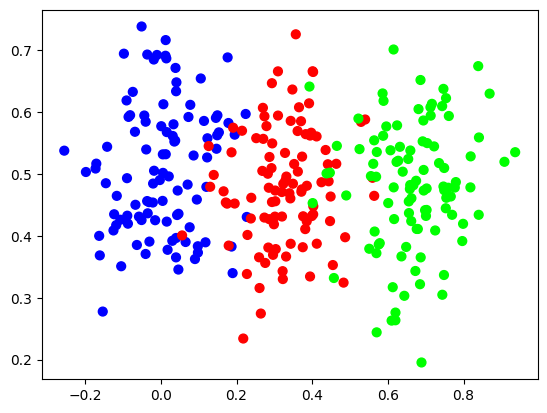

In [27]:
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples= 100, classes=3)
plt.scatter(X[:,0], X[:,1], c= y, s=40, cmap='brg')
plt.show()

In [28]:
# Create model
dense1 = LayerDense(2, 3) # first dense layer, 2 inputs
activation1 = ActivationRelu()
dense2 = LayerDense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = ActivationSoftmax()
# Create loss function
loss_function = CrossEntropy()

# Create variables to track the best loss and the associated weights and biases
lowest_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense1_biases = dense2.biases.copy()

In [29]:
# Optimizing
for iteration in range(10000):
    # Generate a new set of weights for each iteration
    dense1.weights = 0.5 * np.random.randn(2, 3)
    dense1.biases = 0.5 * np.random.randn(1,3)
    dense2.weights = 0.5 * np.random.randn(3, 3)
    dense2.biases = 0.5 * np.random.randn(1,3)
    
    #pass thought the model
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Calculate loss and accuracy
    loss = loss_function.calculate(activation2.ouput, y)
    predictions = np.argmax(activation2.ouput, axis=1)
    accuracy = np.mean(predictions == y)
    
    # Saving the smallest loss
    if loss < lowest_loss:
        print(f'New set of weights found, iteration: {iteration}, loss: {loss}, accuracy: {accuracy}')
        
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense1_biases = dense2.biases.copy()
        
        lowest_loss = loss
    

New set of weights found, iteration: 0, loss: 0.3012894039585327, accuracy: 0.3333333333333333


Now, we use a model that randomly adjust

In [30]:
# Create variables to track the best loss and the associated weights and biases
lowest_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense1_biases = dense2.biases.copy()

# Optimizing
for iteration in range(10000):
    # Generate a new set of weights for each iteration
    dense1.weights += 0.1 * np.random.randn(2, 3)
    dense1.biases += 0.1 * np.random.randn(1,3)
    dense2.weights += 0.1 * np.random.randn(3, 3)
    dense2.biases += 0.1 * np.random.randn(1,3)
    
    #pass thought the model
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Calculate loss and accuracy
    loss = loss_function.calculate(activation2.ouput, y)
    predictions = np.argmax(activation2.ouput, axis=1)
    accuracy = np.mean(predictions == y)
    
    # Saving the smallest loss
    if loss < lowest_loss:
        print(f'New set of weights found, iteration: {iteration}, loss: {loss}, accuracy: {accuracy}')
        
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense1_biases = dense2.biases.copy()
        
        lowest_loss = loss
    
    else:
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense1_biases = dense2.biases.copy()

New set of weights found, iteration: 0, loss: 0.3012894039585327, accuracy: 0.3333333333333333


/var/folders/j3/zt35946979j6ypc5hfm5f28c0000gn/T/ipykernel_88412/2383885377.py:3: RuntimeWarning: overflow encountered in exp
  exp_values = np.exp(inputs)
/var/folders/j3/zt35946979j6ypc5hfm5f28c0000gn/T/ipykernel_88412/2383885377.py:6: RuntimeWarning: invalid value encountered in divide
  probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## Backpropagation

The objective is to understand how much each of the inputs, weights and biases impacts the output. It is done by a back propagation.

It is done by taking the derivative of the loss function. Lets start by making a manual backpropagation.

In [31]:
# forward pass
x = [1, -2, 3]
w = [-3, -1, 2]
b = 1

# Multiplying the imputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b

# Relu activation function
y = max(z, 0)

# Backward pass
dvalue = 1

# The derivative of ReLU() is 1 or 0
drelu_dz = dvalue * (1 if z>0 else 0)
print(drelu_dz)

# drelu/dxw
dz_dxw0 = 1
dz_dxw1 = 1
dz_dxw2 = 1
dz_db = 1

drelu_dxw0 = drelu_dz * dz_dxw0
drelu_dxw1 = drelu_dz * dz_dxw1
drelu_dxw2 = drelu_dz * dz_dxw2
drelu_db = drelu_dz * dz_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)

# dxw / dx
dxw0_dx = w[0]
dxw1_dx = w[1]
dxw2_dx = w[2]
dxw0_dw = x[0]
dxw1_dw = x[1]
dxw2_dw = x[2]

drelu_dx0 = drelu_dz * dz_dxw0 * dxw0_dx
drelu_dx1 = drelu_dz * dz_dxw1 * dxw1_dx
drelu_dx2 = drelu_dz * dz_dxw2 * dxw2_dx
drelu_dw0 = drelu_dz * dz_dxw0 * dxw0_dw
drelu_dw1 = drelu_dz * dz_dxw1 * dxw1_dw
drelu_dw2 = drelu_dz * dz_dxw2 * dxw2_dw
print(drelu_dx0, drelu_dx1, drelu_dx2, drelu_dw0, drelu_dw1, drelu_dw2)


1
1 1 1 1
-3 -1 2 1 -2 3


We are going
to code all of these derivatives in the Dense layer’s class and the ReLU activation class for the
backpropagation step.

In [32]:
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1, 1, 1],
                    [2, 2, 2],
                    [3, 3, 3]])

# We have 3 sets of inputs - samples
inputs = np.array([[1, 2, 3, 2.5],
                   [2, 5, -1, 2],
                   [-1.5, 2.7, 3.3,-0.8]])

# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T

# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]])

# Forward pass
layer_outputs = np.dot(inputs, weights) + biases # Dense layer
relu_outputs = np.maximum(0, layer_outputs) # ReLU activation

# Let's optimize and test backpropagation here
# ReLU activation - simulates derivative with respect to input values
# from next layer passed to current layer during backpropagation
drelu = relu_outputs.copy()
drelu[layer_outputs <= 0] = 0

# Dense layer
# dinputs - multiply by weights
dinputs = np.dot(drelu, weights.T)
# dweights - multiply by inputs
dweights = np.dot(inputs.T, drelu)

# dbiases - sum values, do this over samples (first axis), keepdims
# since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(drelu, axis=0, keepdims=True)

# Update parameters
weights += -0.001 * dweights
biases += -0.001 * dbiases
print(weights)
print(biases)

[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
[[1.98489  2.997739 0.497389]]


Now we implement the backward method in the classes

In [33]:
class ActivationSoftmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs)
        
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = probabilities

In [34]:
class Dense:   
    # Initialize random weigts and biases
    def __init__(self, inputs, neurons) -> None:
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        self.biases = np.random.randn(1, neurons)
        self.inputs = inputs
        
    def forward(self, inputs):
        self.outputs = np.dot(inputs, self.weights) + self.biases
    
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

class Relu:
    def forward(self, inputs):
        self.outputs = np.maximum(0, inputs)
    
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.dinputs <= 0] = 0

class ActivationSoftmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs)
        
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = probabilities
    
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        
        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

class Loss:   
    def calculate(self, output, y):
        
        # calculate sample lossses
        sample_losses = self.forward(output, y)
        
        # calculate mean loss
        data_loss = np.mean(sample_losses)
        
        return data_loss

class CategoricalCrossEntropy:
    def forward(self, y_pred, y_true):
        
        # number of samples in batch
        samples = len(y_pred)
        
        # clip data
        y_pred_clipped = np.clip(y_pred, 1e-7, 1- 1e-7)
        
        # Probability for target values
        if len(y_true.shape) == 1:
            correct_confidenses = y_pred_clipped[range(samples), y_true]

        # Mask values- only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidenses = np.sum(y_pred_clipped * y_true, axis=1)
        
        # Losses
        negative_log = -np.log(correct_confidenses)
        return negative_log
    
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        
        # Number of labels in every sample
        labels = len(dvalues[0])
        
        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        
        # Calculate gradient
        self.dinputs = -y_true / dvalues
        
        # Normalize gradient
        self.dinputs = self.dinputs / samples
        
# Softmax classifier 
class SoftmaxClassifier():
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = ActivationSoftmax()
        self.loss = CategoricalCrossEntropy()
    
    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        
        # Set the output
        self.output = self.activation.output
        
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)
    
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        
        # If labels are one-hot encoded, turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        
        self.dinputs = dvalues.copy()
        
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        
        # Normalize gradient
        self.dinputs = self.dinputs / samples

Test if softmax classifier is better

In [35]:
softmax_outputs = np.array([[0.3, 0.6, 0.1],
                           [0.02, 0.4, 0.09],
                           [0.4, 0.1, 0.9]])

class_targets = np.array([0,1,1])

softmax_loss = SoftmaxClassifier()
softmax_loss.backward(softmax_outputs, class_targets)
dvalues1 = softmax_loss.dinputs

activation = ActivationSoftmax()
activation.output = softmax_outputs
loss = CategoricalCrossEntropy()
loss.backward(softmax_outputs, class_targets)
activation.backward(loss.dinputs)
dvalues2 = activation.dinputs

print('Gradients: combined loss and activation:')
print(dvalues1)
print('Gradients: separate loss and activation:')
print(dvalues2)

Gradients: combined loss and activation:
[[-0.23333333  0.2         0.03333333]
 [ 0.00666667 -0.2         0.03      ]
 [ 0.13333333 -0.3         0.3       ]]
Gradients: separate loss and activation:
[[-0.23333333  0.2         0.03333333]
 [ 0.00666667 -0.2         0.03      ]
 [ 0.13333333 -0.30000001  0.30000001]]


Now lets use it in our data

In [36]:
# Create dataset
X,y = spiral_data(samples=100, classes=3)

# Create the layers and activation functions
dense1 = Dense(2, 3)
activation1 = Relu()
dense2 = Dense(3, 3)
loss_activation = SoftmaxClassifier()

# Pass forward
dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
loss = loss_activation.forward(dense2.outputs, y)


print(loss_activation.output[:5])
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)

print('acc:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

AttributeError: 'CategoricalCrossEntropy' object has no attribute 'calculate'